In [17]:
import os
import sys
import re
from typing import Optional, List, Literal

while any(marker in os.getcwd() for marker in ['workspace']):
    os.chdir("..")

# Append 'classes_and_functions' directory to sys.path
sys.path.append('classes_and_functions')

# Get the current working directory
current_directory = os.getcwd()
current_directory


'd:\\task3_machine_learning_D\\Algorithms'

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [19]:
from classes_and_functions.custom_transformers import (
    DropColumnTransformer,
    CustomImputer,
    CustomStandardScaler,
    CustomLabelEncoder,
    CustomOneHotEncoder,
    CustomOutlierDetector,
    CustomOutlierRemover,
    CustomMinMaxScaler,
    #NaNIndicator,
    #CustomCategoryDivider,
    #CustomWhitespaceRemover,
    #CustomClassifier
)


In [84]:
from classes_and_functions.classification import (CustomClassifier)

In [20]:
# from classes_and_functions.custom_transformers import NaNIndicator

In [21]:
raw_data = pd.read_csv('attachments/Data_set_task_3.csv')
raw_data.head()


,Unnamed: 0.1,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,0,147.32.80.9,147.32.84.165,4,2,134,558,1.312967e+09,1.312967e+09,...,207900.070205,0.885171,0.205123,0.417904,NaN,4248.583372,4544.559854,0.564213,0.003325,neris
1,1,1,147.32.84.255,147.32.84.165,38,0,2476,0,1.312967e+09,1.312967e+09,...,5314.872532,0.038851,0.241710,0.223803,-1.333903,3.640725,0.786195,-0.830029,0.046606,clear
2,2,2,147.32.84.255,147.32.84.165,6,0,1160,0,1.312967e+09,1.312967e+09,...,-271216.457937,0.010243,0.393857,0.271931,NaN,214.629001,1171.605316,-0.489713,0.011965,clear
3,3,3,147.32.84.165.,60.190.222.139,4,0,249,0,1.312967e+09,1.312967e+09,...,-1060.499747,0.006667,0.407122,0.273574,-0.362061,1.505125,2.539462,-0.400313,0.010620,clear
4,4,4,60.190.222.139.,147.32.84.165,10,0,138,0,1.312967e+09,1.312967e+09,...,-4837.676869,0.187056,0.482592,0.285750,-0.098411,1.314013,2.857491,0.565604,0.021624,clear


####COŚ TU MUSI BYĆ AAAAAAAAAA


In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176640 entries, 0 to 176639
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0.1                176640 non-null  int64  
 1   Unnamed: 0                  176640 non-null  int64  
 2   DST_IP                      176640 non-null  object 
 3   SRC_IP                      176640 non-null  object 
 4   PACKETS                     176640 non-null  int64  
 5   PACKETS_REV                 176640 non-null  int64  
 6   BYTES                       176640 non-null  int64  
 7   BYTES_REV                   176640 non-null  int64  
 8   TIME_FIRST                  176640 non-null  float64
 9   TIME_LAST                   176640 non-null  float64
 10  DST_PORT                    176640 non-null  int64  
 11  SRC_PORT                    176640 non-null  int64  
 12  MEAN                        176640 non-null  int64  
 13  MEDIAN        

In [23]:
raw_data.describe()

,Unnamed: 0.1,Unnamed: 0,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,...,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF
count,176640.000000,176640.000000,176640.000000,176640.000000,1.766400e+05,176640.000000,1.766400e+05,1.766400e+05,176640.000000,176640.000000,...,4.312100e+04,43121.000000,176640.000000,39334.000000,36059.000000,26100.000000,4.312100e+04,4.312100e+04,176640.000000,4.312100e+04
mean,21168.632971,21168.632971,9.419888,0.217771,2.709868e+03,44.503872,1.313300e+09,1.313300e+09,2999.505480,4250.088111,...,5.366581e+06,1288.679880,0.066117,0.531804,0.274129,-0.020180,-4.040107e+02,4.960171e+11,0.001087,2.961745e-01
std,16541.011330,16541.011330,169.797195,4.108624,2.510049e+05,703.591065,1.915764e+05,1.915729e+05,8024.511061,7951.819407,...,8.263482e+06,141888.336488,0.186869,4.480683,0.042967,0.346216,4.303365e+04,7.221156e+13,0.304518,3.558592e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.312967e+09,1.312967e+09,0.000000,21.000000,...,5.956974e+03,-353447.270758,0.006667,-284.708880,0.000233,-4.374491,-3.911477e+06,1.197955e-05,-0.993135,2.220446e-16
25%,7461.750000,7461.750000,3.000000,0.000000,0.000000e+00,0.000000,1.313059e+09,1.313059e+09,25.000000,1042.000000,...,1.214269e+04,-4702.869615,0.006667,0.465382,0.269788,-0.125575,1.030636e+00,2.720182e-01,0.000000,3.168378e-02
50%,17461.000000,17461.000000,6.000000,0.000000,0.000000e+00,0.000000,1.313384e+09,1.313384e+09,135.000000,2343.000000,...,2.327382e+04,1803.926840,0.006667,0.504215,0.284076,0.000587,1.725682e+00,2.726630e+00,0.000000,1.228350e-01
75%,31998.000000,31998.000000,6.000000,0.000000,2.500000e+01,0.000000,1.313452e+09,1.313452e+09,2578.000000,4052.000000,...,9.884095e+06,8205.515912,0.006667,0.543769,0.287304,0.112778,4.859257e+00,7.922754e+01,0.000000,4.489483e-01
max,63913.000000,63913.000000,37770.000000,697.000000,5.648519e+07,58896.000000,1.313567e+09,1.313567e+09,65520.000000,65520.000000,...,2.499000e+07,353447.266462,0.999801,451.937436,3.389829,2.221562,1.386986e+06,1.140911e+16,0.993135,1.000000e+00


Checking correlation

In [24]:
numeric_data = raw_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Unnamed: 0.1,Unnamed: 0,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,...,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF
Unnamed: 0.1,1.000000,1.000000,-0.017364,-0.050632,-0.007857,-0.060119,0.362223,0.362215,0.175285,-0.021194,...,-0.042699,-0.016296,-0.108421,-0.002707,0.022009,0.096321,0.005168,-0.004934,0.071842,-0.046200
Unnamed: 0,1.000000,1.000000,-0.017364,-0.050632,-0.007857,-0.060119,0.362223,0.362215,0.175285,-0.021194,...,-0.042699,-0.016296,-0.108421,-0.002707,0.022009,0.096321,0.005168,-0.004934,0.071842,-0.046200
PACKETS,-0.017364,-0.017364,1.000000,0.045985,0.988998,0.031765,-0.005487,-0.005470,0.019951,0.006137,...,-0.035255,0.001878,0.021083,-0.000811,0.001761,-0.030469,0.000501,-0.000450,-0.021255,0.011232
PACKETS_REV,-0.050632,-0.050632,0.045985,1.000000,0.000730,0.702571,-0.050001,-0.049969,-0.014411,-0.000141,...,-0.045045,0.005321,0.096174,0.000814,-0.018472,0.065989,0.000501,0.000083,0.019931,0.032563
BYTES,-0.007857,-0.007857,0.988998,0.000730,1.000000,0.001036,0.002675,0.002683,0.010038,-0.001464,...,-0.012429,0.000715,0.003466,-0.000350,0.000711,-0.014843,0.000188,-0.000149,-0.008192,0.012494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPECTRAL_SLOPE,0.096321,0.096321,-0.030469,0.065989,-0.014843,0.076755,-0.045702,-0.045663,-0.129982,0.108321,...,-0.037667,-0.088790,0.484735,0.943823,0.126488,1.000000,-0.305489,-0.091084,0.550646,0.049073
SPECTRAL_CREST,0.005168,0.005168,0.000501,0.000501,0.000188,0.000343,-0.009265,-0.009264,0.003301,0.004114,...,0.000770,0.016628,-0.000565,-0.820761,0.370098,-0.305489,1.000000,0.000257,-0.000112,0.004408
SPECTRAL_FLUX,-0.004934,-0.004934,-0.000450,0.000083,-0.000149,-0.000707,-0.000631,-0.000632,-0.001863,-0.001869,...,0.008858,-0.002111,-0.005337,-0.000604,-0.033571,-0.091084,0.000257,1.000000,0.005853,-0.005717
SPECTRAL_BANDWIDTH,0.071842,0.071842,-0.021255,0.019931,-0.008192,0.021594,-0.003329,-0.003323,-0.020738,0.058122,...,-0.005903,-0.000898,0.399339,0.006469,0.041001,0.550646,-0.000112,0.005853,1.000000,-0.147859


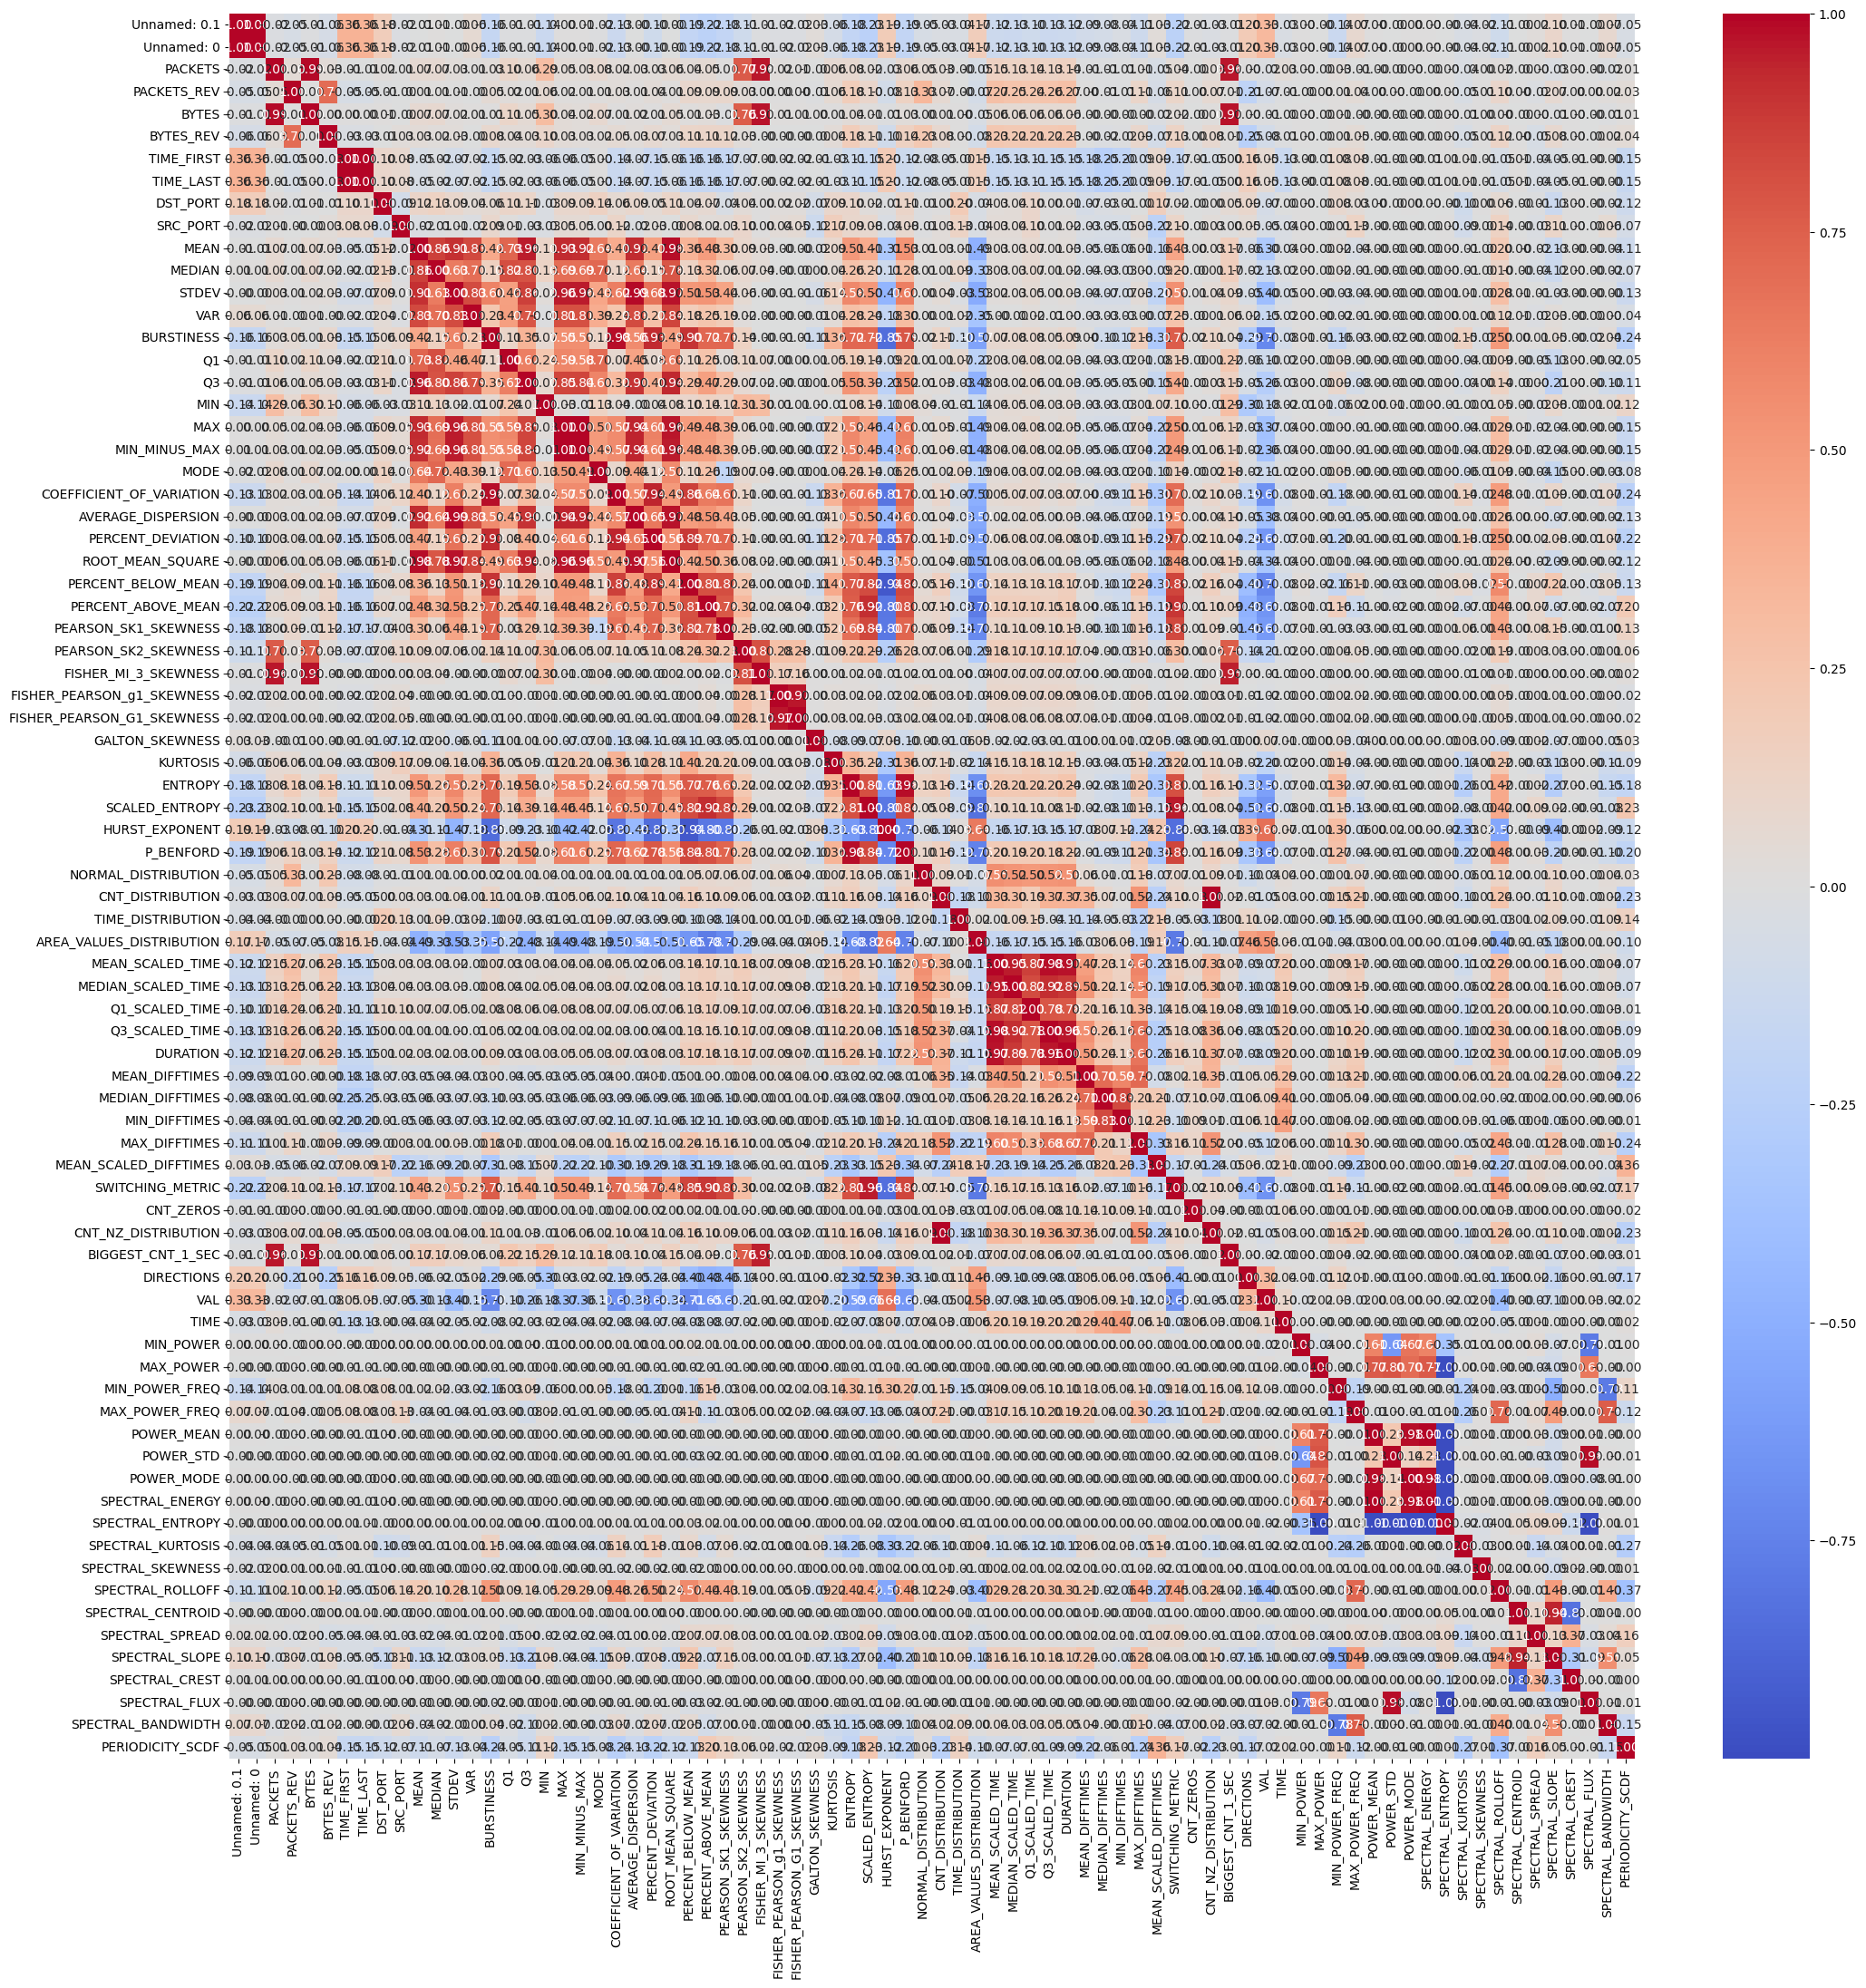

In [25]:
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [26]:
high_corr_threshold = 0.8
high_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs) > high_corr_threshold) & (abs(high_corr_pairs) < 1)]
high_corr_pairs


SPECTRAL_ENTROPY  SPECTRAL_FLUX         -0.999924
SPECTRAL_FLUX     SPECTRAL_ENTROPY      -0.999924
MAX_POWER         SPECTRAL_ENTROPY      -0.999924
SPECTRAL_ENTROPY  MAX_POWER             -0.999924
                  POWER_MODE            -0.999924
                                           ...   
CNT_DISTRIBUTION  CNT_NZ_DISTRIBUTION    0.999840
TIME_FIRST        TIME_LAST              1.000000
TIME_LAST         TIME_FIRST             1.000000
SPECTRAL_ENERGY   POWER_MEAN             1.000000
POWER_MEAN        SPECTRAL_ENERGY        1.000000
Length: 178, dtype: float64

Displaying unique pairs of highly correlated features 

In [27]:
high_corr_pairs_df = high_corr_pairs.reset_index()
high_corr_pairs_df.columns = ['Feature1', 'Feature2', 'Correlation']

unique_high_corr_pairs = high_corr_pairs_df[high_corr_pairs_df['Feature1'] < high_corr_pairs_df['Feature2']]
unique_high_corr_pairs


,Feature1,Feature2,Correlation
0,SPECTRAL_ENTROPY,SPECTRAL_FLUX,-0.999924
2,MAX_POWER,SPECTRAL_ENTROPY,-0.999924
5,POWER_MODE,SPECTRAL_ENTROPY,-0.999924
6,POWER_STD,SPECTRAL_ENTROPY,-0.999921
9,POWER_MEAN,SPECTRAL_ENTROPY,-0.999871
...,...,...,...
168,AVERAGE_DISPERSION,STDEV,0.991043
170,MAX,MIN_MINUS_MAX,0.999137
173,CNT_DISTRIBUTION,CNT_NZ_DISTRIBUTION,0.999840
174,TIME_FIRST,TIME_LAST,1.000000


Checking missing values

In [44]:
missing_values = raw_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

NORMAL_DISTRIBUTION            104
TIME_DISTRIBUTION             3193
AREA_VALUES_DISTRIBUTION        14
MEAN_DIFFTIMES                3193
MEDIAN_DIFFTIMES              3193
MIN_DIFFTIMES                 3193
MAX_DIFFTIMES                 3193
MEAN_SCALED_DIFFTIMES         3195
MIN_POWER                   133519
MAX_POWER                   133519
MIN_POWER_FREQ              133519
MAX_POWER_FREQ              133519
POWER_MEAN                  133519
POWER_STD                   133519
SPECTRAL_ENERGY             133519
SPECTRAL_ENTROPY            148954
SPECTRAL_KURTOSIS           133519
SPECTRAL_SKEWNESS           133519
SPECTRAL_CENTROID           137306
SPECTRAL_SPREAD             140581
SPECTRAL_SLOPE              150540
SPECTRAL_CREST              133519
SPECTRAL_FLUX               133519
PERIODICITY_SCDF            133519
dtype: int64


Missing value distribution

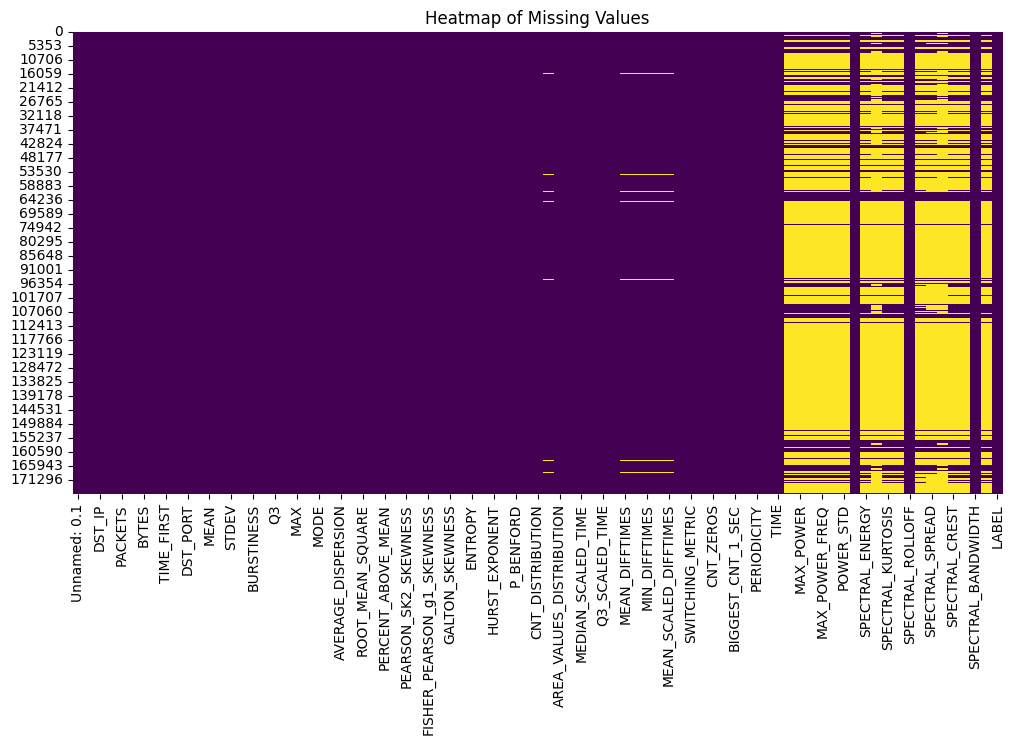

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

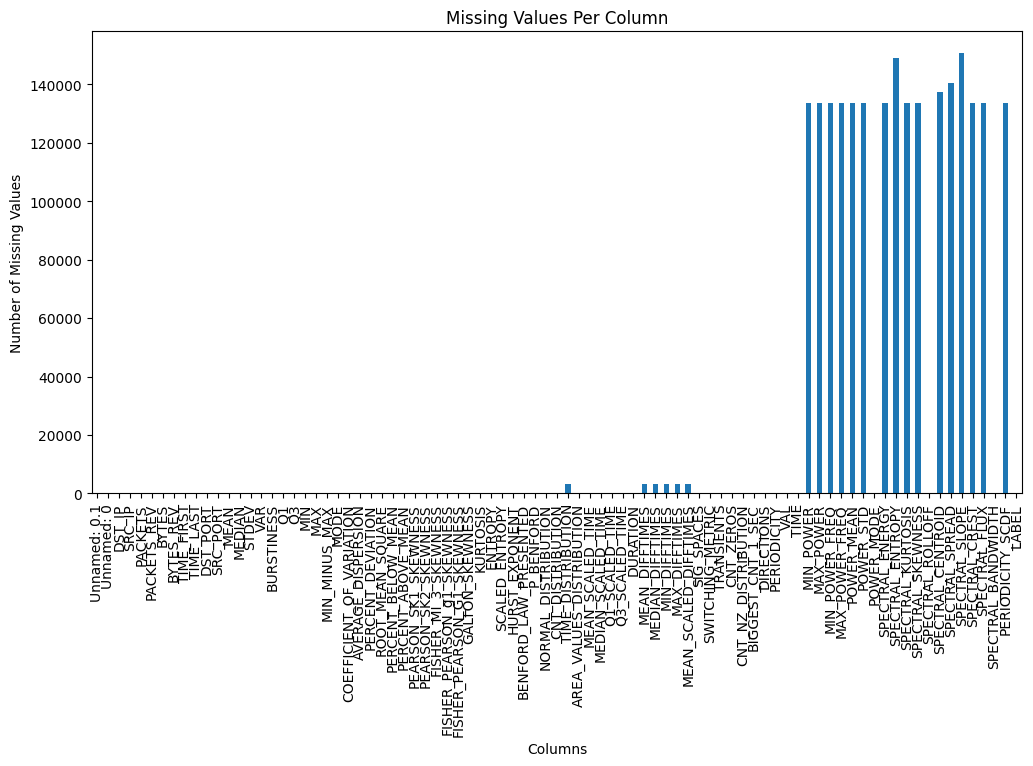

In [46]:
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values Per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

In [ ]:
sample_frac = 0.1  # Adjust this fraction to control the sample size

columns_to_plot = ['NORMAL_DISTRIBUTION', 'TIME_DISTRIBUTION', 'AREA_VALUES_DISTRIBUTION', 'MEAN_DIFFTIMES', 'MEDIAN_DIFFTIMES', 'MIN_DIFFTIMES', 'MAX_DIFFTIMES', 'MEAN_SCALED_DIFFTIMES','MIN_POWER', 'MAX_POWER', 'MIN_POWER_FREQ', 'MAX_POWER_FREQ', 'POWER_MEAN', 'POWER_STD', 'SPECTRAL_ENERGY', 'SPECTRAL_ENTROPY', 'SPECTRAL_KURTOSIS', 'SPECTRAL_SKEWNESS', 'SPECTRAL_CENTROID', 'SPECTRAL_SPREAD', 'SPECTRAL_SLOPE', 'SPECTRAL_CREST', 'SPECTRAL_FLUX', 'PERIODICITY_SCDF']


for col in columns_to_plot:
    sampled_data = raw_data[col].dropna().sample(frac=sample_frac, random_state=42)
    plt.figure(figsize=(8, 6))
    sns.histplot(sampled_data, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [82]:
columns_to_summarize = ['NORMAL_DISTRIBUTION', 'TIME_DISTRIBUTION', 'AREA_VALUES_DISTRIBUTION', 'MEAN_DIFFTIMES', 'MEDIAN_DIFFTIMES', 'MIN_DIFFTIMES', 'MAX_DIFFTIMES', 'MEAN_SCALED_DIFFTIMES','MIN_POWER', 'MAX_POWER', 'MIN_POWER_FREQ', 'MAX_POWER_FREQ', 'POWER_MEAN', 'POWER_STD', 'SPECTRAL_ENERGY', 'SPECTRAL_ENTROPY', 'SPECTRAL_KURTOSIS', 'SPECTRAL_SKEWNESS', 'SPECTRAL_CENTROID', 'SPECTRAL_SPREAD', 'SPECTRAL_SLOPE', 'SPECTRAL_CREST', 'SPECTRAL_FLUX', 'PERIODICITY_SCDF']

for col in columns_to_summarize:
    summary_stats = raw_data[col].dropna().describe()
    print(f'Summary statistics for {col}:\n{summary_stats}\n')


Summary statistics for NORMAL_DISTRIBUTION:
count    176640.000000
mean          0.001643
std           0.031199
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.990000
Name: NORMAL_DISTRIBUTION, dtype: float64

Summary statistics for TIME_DISTRIBUTION:
count    176640.000000
mean          0.473013
std           0.083075
min           0.000000
25%           0.444429
50%           0.494112
75%           0.500000
max           0.968329
Name: TIME_DISTRIBUTION, dtype: float64

Summary statistics for AREA_VALUES_DISTRIBUTION:
count    176640.000000
mean          0.844040
std           0.076351
min           0.092742
25%           0.875000
50%           0.875000
75%           0.875000
max           0.949937
Name: AREA_VALUES_DISTRIBUTION, dtype: float64

Summary statistics for MEAN_DIFFTIMES:
count    176640.000000
mean          1.379313
std           2.742538
min           0.000000
25%           0.212233
50%           0.580722
75% 

Calculate the percentage of missing values for each column

In [72]:
missing_percentage = raw_data.isnull().mean() * 100
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage_sorted)


SPECTRAL_SLOPE       85.224185
SPECTRAL_ENTROPY     84.326313
SPECTRAL_SPREAD      79.586164
SPECTRAL_CENTROID    77.732111
SPECTRAL_ENERGY      75.588202
MAX_POWER_FREQ       75.588202
MIN_POWER            75.588202
MIN_POWER_FREQ       75.588202
MAX_POWER            75.588202
SPECTRAL_KURTOSIS    75.588202
POWER_STD            75.588202
POWER_MEAN           75.588202
SPECTRAL_SKEWNESS    75.588202
SPECTRAL_FLUX        75.588202
SPECTRAL_CREST       75.588202
PERIODICITY_SCDF     75.588202
MEDIAN_DIFFTIMES      1.807631
dtype: float64


## Handling missing values

In some columns, a significant portion of the data is missing (more, than 75%) and imputation might not be effective, so we will drop those features, because we do not want to introduce bias.

In [73]:
columns_to_drop = ['SPECTRAL_SLOPE', 'SPECTRAL_ENTROPY', 'SPECTRAL_SPREAD', 'SPECTRAL_CENTROID', 'SPECTRAL_ENERGY', 'MAX_POWER_FREQ', 'MIN_POWER', 'MIN_POWER_FREQ', 'MAX_POWER', 'SPECTRAL_KURTOSIS', 'POWER_STD', 'POWER_MEAN', 'SPECTRAL_SKEWNESS', 'SPECTRAL_FLUX', 'SPECTRAL_CREST', 'PERIODICITY_SCDF']

In [74]:
median_imputer = SimpleImputer(strategy='median')
median_columns = ['NORMAL_DISTRIBUTION', 'TIME_DISTRIBUTION', 'MEAN_DIFFTIMES', 'MEDIAN_DIFFTIMES','MIN_DIFFTIMES', 'MAX_DIFFTIMES', 'MEAN_SCALED_DIFFTIMES']

In [75]:
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_columns = ['AREA_VALUES_DISTRIBUTION']

In [83]:
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('drop_columns', DropColumnTransformer(columns=columns_to_drop), raw_data.columns),
        ('median_imputer', median_imputer, median_columns),
        ('mode_imputer', mode_imputer, mode_columns)
    ])

## Choosing the right model, making a pipeline

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
custom_classifier = CustomClassifier(preprocessing_pipeline=preprocessing_pipeline, model=model)


## split data into features X and data y